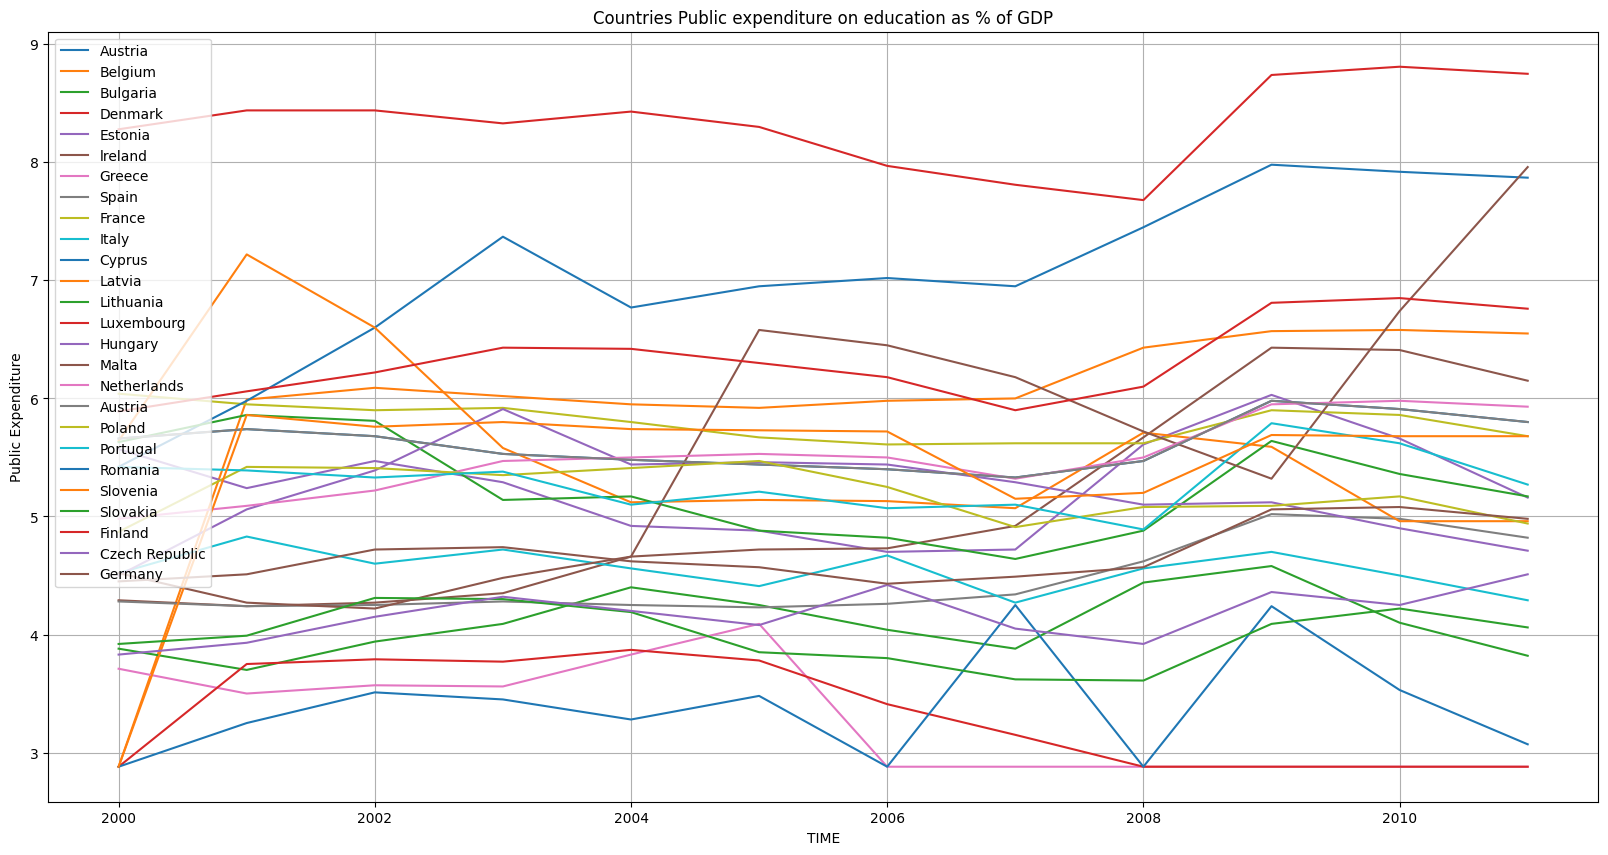

          TIME      GEO                                           INDIC_ED  \
TIME                                                                         
2000 36   2000  Denmark  Total public expenditure on education as % of ...   
     108  2000   France  Total public expenditure on education as % of ...   
     288  2000  Finland  Total public expenditure on education as % of ...   
     216  2000  Austria  Total public expenditure on education as % of ...   
     144  2000   Latvia  Total public expenditure on education as % of ...   
2001 37   2001  Denmark  Total public expenditure on education as % of ...   
     145  2001   Latvia  Total public expenditure on education as % of ...   
     289  2001  Finland  Total public expenditure on education as % of ...   
     1    2001  Belgium  Total public expenditure on education as % of ...   
     133  2001   Cyprus  Total public expenditure on education as % of ...   
2002 38   2002  Denmark  Total public expenditure on education a

In [32]:
from os import posix_fadvise
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import csv
import datetime as dt

path="/content/drive/MyDrive/Data set/Data_sample_Lesson1.csv"
df=pd.read_csv(path)
df.head()
#Removing irrelavant symbols
df["Value"]= df["Value"].str.lstrip(":")
df
#Removing irrelevant data
for x in df.index:
  if df.loc[x, "GEO"]== 'European Union (28 countries)':
     df.drop(x,inplace=True)


for x in df.index:
  if df.loc[x, "GEO"]== 'European Union (27 countries)':
     df.drop(x,inplace=True)

for x in df.index:
  if df.loc[x, "GEO"]== 'European Union (25 countries)':
     df.drop(x,inplace=True)

for x in df.index:
  if df.loc[x, "GEO"]== 'Euro area (18 countries)':
     df.drop(x,inplace=True)


for x in df.index:
  if df.loc[x, "GEO"]== 'Euro area (17 countries)':
     df.drop(x,inplace=True)

for x in df.index:
  if df.loc[x, "GEO"]== 'Euro area (15 countries)':
     df.drop(x,inplace=True)


for x in df.index:
  if df.loc[x, "GEO"]== 'Euro area (13 countries)':
     df.drop(x,inplace=True)
#Resetting the index numbers
df= df.reset_index(drop=True)
#dropping irrelevant column
df=df.drop(columns="Flag and Footnotes")

df = df.replace(r'^\s*$', np.nan, regex=True)

df['Value']=df['Value'].astype(float)
#Filling empty cells with the minimum value
df.fillna(df.Value.min(),inplace=True)
df


df1=df.pivot(index="TIME" , columns="GEO" , values = "Value")

df1
rcParams['figure.figsize']=(20,10)
#Making plots with data
plt.plot(df1.index, df1.Austria, label='Austria')
plt.plot(df1.index, df1.Belgium, label='Belgium')
plt.plot(df1.index, df1.Bulgaria,label='Bulgaria')
plt.plot(df1.index, df1.Denmark, label='Denmark')
plt.plot(df1.index, df1.Estonia,label='Estonia')
plt.plot(df1.index, df1.Ireland,label='lreland')
plt.plot(df1.index, df1.Greece,label='Greece')
plt.plot(df1.index, df1.Spain,label='Spain')
plt.plot(df1.index, df1.France,label='France')
plt.plot(df1.index, df1.Italy,label='Italy')
plt.plot(df1.index, df1.Cyprus,label='Cyprus')
plt.plot(df1.index, df1.Latvia,label='Latvia')
plt.plot(df1.index, df1.Lithuania,label='Lithuania')
plt.plot(df1.index, df1.Luxembourg,label='Luxembourg')
plt.plot(df1.index, df1.Hungary,label='Hungary')
plt.plot(df1.index, df1.Malta, label='Malta')
plt.plot(df1.index, df1.Netherlands, label='Netherlands')
plt.plot(df1.index, df1.Austria, label='Austria')
plt.plot(df1.index, df1.Poland, label='Poland')
plt.plot(df1.index, df1.Portugal,label='Portugal')
plt.plot(df1.index, df1.Romania, label='Romania')
plt.plot(df1.index, df1.Slovenia,label='Slovenia')
plt.plot(df1.index, df1.Slovakia,label='Slovakia')
plt.plot(df1.index, df1.Finland,label='Finland')
plt.plot(df1.index, df1["Czech Republic"], label='Czech Republic')
plt.plot(df1.index, df1["Germany (until 1990 former territory of the FRG)"], label='Germany')



#Labelling the graph
plt.title('Countries Public expenditure on education as % of GDP')
plt.legend(loc=2)
plt.grid(True)
plt.xlabel('TIME')
plt.ylabel('Public Expenditure')

plt.show()


#For each year top 5 countries with the largest expenditure
top_countries=df.groupby('TIME').apply(lambda x: x.nlargest(5,'Value'))
print(top_countries)

#Countries with the most increase
df['Increase']=df.groupby('GEO')['Value'].diff()
top_increase=df.groupby('GEO')['Increase'].sum().nlargest(5)
print(top_increase)

#Iist of years for each country when there was decrease, and increase
decrease_years=df[df['Increase']< 0].groupby('GEO')['TIME'].apply(list)
no_increase_years=df[df['Increase']==0].groupby('GEO')['TIME'].apply(list)
increase_years=df[df['Increase']> 0].groupby('GEO')['TIME'].apply(list)
print('Years of decrease:')
print(decrease_years)
print('Years when they was no incrrease:')
print(no_increase_years)
print('Years of increase:')
print(increase_years)

#Saving tables as Excel file
with pd.ExcelWriter('education_expenditure_analysis.xlsx') as writer:
    top_countries.to_excel(writer, sheet_name='Top Countries')
    top_increase.to_excel(writer, sheet_name='Top Increase')
    decrease_years.to_excel(writer, sheet_name='Decrease Years')
    no_increase_years.to_excel(writer, sheet_name='No Increase Years')
    increase_years.to_excel(writer, sheet_name='Increase Years')

